<a href="https://colab.research.google.com/github/oMangoo/hackathon24/blob/main/olympics_swim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [129]:
from google.colab import files
import pandas as pd
import numpy as np
import plotly.express as px
import io
from sklearn.linear_model import LinearRegression

uploaded = files.upload()

Saving Olympic_Swimming_Results_1912to2020.csv to Olympic_Swimming_Results_1912to2020 (2).csv


In [245]:
#loading data
df = pd.read_csv(io.BytesIO(uploaded['Olympic_Swimming_Results_1912to2020 (2).csv']))
display(df)

print(df.head())

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


  Location  Year Distance (in meters)      Stroke  Relay? Gender Team  \
0    Tokyo  2020                 100m  Backstroke       0    Men  ROC   
1    Tokyo  2020                 100m  Backstroke       0    Men  ROC   
2    Tokyo  2020                 100m  Backstroke       0    Men  USA   
3    Tokyo  2020                 100m  Backstroke       0    Men  ITA   
4    Tokyo  2020                 100m  Backstroke       0    Men  CHN   

              Athlete Results  Rank  
0        Evgeny Rylov   51.98     1  
1  Kliment Kolesnikov      52     2  
2         Ryan Murphy   52.19     3  
3       Thomas Ceccon    52.3     4  
4            Jiayu Xu   52.51     4  


##Cleaning

In [246]:
#only olympics in the 2000s
df = df[(df['Year'] >= 2000)]
print(df)

     Location  Year Distance (in meters)      Stroke  Relay? Gender Team  \
0       Tokyo  2020                 100m  Backstroke       0    Men  ROC   
1       Tokyo  2020                 100m  Backstroke       0    Men  ROC   
2       Tokyo  2020                 100m  Backstroke       0    Men  USA   
3       Tokyo  2020                 100m  Backstroke       0    Men  ITA   
4       Tokyo  2020                 100m  Backstroke       0    Men  CHN   
...       ...   ...                  ...         ...     ...    ...  ...   
1499   Sydney  2000                 800m   Freestyle       0  Women  SUI   
1500   Sydney  2000                 800m   Freestyle       0  Women  GER   
1501   Sydney  2000                 800m   Freestyle       0  Women  CHN   
1502   Sydney  2000                 800m   Freestyle       0  Women  GER   
1503   Sydney  2000                 800m   Freestyle       0  Women  JPN   

                 Athlete          Results  Rank  
0           Evgeny Rylov            5

In [247]:
#removes long distance swims
mask = df['Distance (in meters)'].isin(['4x200', '4x100', '1500m'])

#select all rows except the ones that contain the specified distances
df = df[~mask]

print(df)

     Location  Year Distance (in meters)      Stroke  Relay? Gender Team  \
0       Tokyo  2020                 100m  Backstroke       0    Men  ROC   
1       Tokyo  2020                 100m  Backstroke       0    Men  ROC   
2       Tokyo  2020                 100m  Backstroke       0    Men  USA   
3       Tokyo  2020                 100m  Backstroke       0    Men  ITA   
4       Tokyo  2020                 100m  Backstroke       0    Men  CHN   
...       ...   ...                  ...         ...     ...    ...  ...   
1499   Sydney  2000                 800m   Freestyle       0  Women  SUI   
1500   Sydney  2000                 800m   Freestyle       0  Women  GER   
1501   Sydney  2000                 800m   Freestyle       0  Women  CHN   
1502   Sydney  2000                 800m   Freestyle       0  Women  GER   
1503   Sydney  2000                 800m   Freestyle       0  Women  JPN   

                 Athlete          Results  Rank  
0           Evgeny Rylov            5

In [248]:
#remove relay column
df = df.drop(['Relay?'], axis=1)
print(df)

     Location  Year Distance (in meters)      Stroke Gender Team  \
0       Tokyo  2020                 100m  Backstroke    Men  ROC   
1       Tokyo  2020                 100m  Backstroke    Men  ROC   
2       Tokyo  2020                 100m  Backstroke    Men  USA   
3       Tokyo  2020                 100m  Backstroke    Men  ITA   
4       Tokyo  2020                 100m  Backstroke    Men  CHN   
...       ...   ...                  ...         ...    ...  ...   
1499   Sydney  2000                 800m   Freestyle  Women  SUI   
1500   Sydney  2000                 800m   Freestyle  Women  GER   
1501   Sydney  2000                 800m   Freestyle  Women  CHN   
1502   Sydney  2000                 800m   Freestyle  Women  GER   
1503   Sydney  2000                 800m   Freestyle  Women  JPN   

                 Athlete          Results  Rank  
0           Evgeny Rylov            51.98     1  
1     Kliment Kolesnikov               52     2  
2            Ryan Murphy         

In [249]:
#filter the data for a specific event (e.g., Men's 100m Backstroke)
#this can be any event, but i chose to do this event for this project
df = df[(df['Distance (in meters)'] == "100m") & (df['Stroke'] == "Backstroke") & (df['Gender'] == "Men")] # Use the '&' operator for element-wise 'and'

print(df.head())

  Location  Year Distance (in meters)      Stroke Gender Team  \
0    Tokyo  2020                 100m  Backstroke    Men  ROC   
1    Tokyo  2020                 100m  Backstroke    Men  ROC   
2    Tokyo  2020                 100m  Backstroke    Men  USA   
3    Tokyo  2020                 100m  Backstroke    Men  ITA   
4    Tokyo  2020                 100m  Backstroke    Men  CHN   

              Athlete Results  Rank  
0        Evgeny Rylov   51.98     1  
1  Kliment Kolesnikov      52     2  
2         Ryan Murphy   52.19     3  
3       Thomas Ceccon    52.3     4  
4            Jiayu Xu   52.51     4  


In [250]:
#function for converting minutes to float (into seconds)
def conversion(time_str):
  if ':' in time_str:
    time_parts = time_str.split(':')
    if len(time_parts) == 2:
      minutes, seconds = time_parts
      total_seconds = float(minutes) * 60 + float(seconds)
    elif len(time_parts) == 3:
      minutes, seconds, milliseconds = time_parts
    try:
      total_seconds = float(minutes) * 60 + float(seconds)
      return total_seconds
    except ValueError:
      return None
  else: #time is already in seconds
    total_seconds = float(time_str)
  return total_seconds

In [251]:
#convert time in results to seconds
df['Time'] = df['Results'].apply(conversion)

print(df)

     Location  Year Distance (in meters)      Stroke Gender Team  \
0       Tokyo  2020                 100m  Backstroke    Men  ROC   
1       Tokyo  2020                 100m  Backstroke    Men  ROC   
2       Tokyo  2020                 100m  Backstroke    Men  USA   
3       Tokyo  2020                 100m  Backstroke    Men  ITA   
4       Tokyo  2020                 100m  Backstroke    Men  CHN   
5       Tokyo  2020                 100m  Backstroke    Men  ESP   
6       Tokyo  2020                 100m  Backstroke    Men  AUS   
7       Tokyo  2020                 100m  Backstroke    Men  ROU   
224       Rio  2016                 100m  Backstroke    Men  USA   
225       Rio  2016                 100m  Backstroke    Men  CHN   
226       Rio  2016                 100m  Backstroke    Men  USA   
227       Rio  2016                 100m  Backstroke    Men  AUS   
228       Rio  2016                 100m  Backstroke    Men  FRA   
229       Rio  2016                 100m  Backst

In [252]:
#no empty cells
df.dropna(inplace = True)
print(df)

     Location  Year Distance (in meters)      Stroke Gender Team  \
0       Tokyo  2020                 100m  Backstroke    Men  ROC   
1       Tokyo  2020                 100m  Backstroke    Men  ROC   
2       Tokyo  2020                 100m  Backstroke    Men  USA   
3       Tokyo  2020                 100m  Backstroke    Men  ITA   
4       Tokyo  2020                 100m  Backstroke    Men  CHN   
5       Tokyo  2020                 100m  Backstroke    Men  ESP   
6       Tokyo  2020                 100m  Backstroke    Men  AUS   
7       Tokyo  2020                 100m  Backstroke    Men  ROU   
224       Rio  2016                 100m  Backstroke    Men  USA   
225       Rio  2016                 100m  Backstroke    Men  CHN   
226       Rio  2016                 100m  Backstroke    Men  USA   
227       Rio  2016                 100m  Backstroke    Men  AUS   
228       Rio  2016                 100m  Backstroke    Men  FRA   
229       Rio  2016                 100m  Backst

In [253]:
df.shape

(48, 10)

#Model

##Linear Regression

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [255]:
train = df['Year'].values.reshape(-1, 1)
test = df['Results'].apply(lambda x: int(x.split(':')[0])*60 + float(x.split(':')[1]) if ':' in x else float(x)).values

In [288]:
#training
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42) #test size = training set gets 7 samples, testing set gets 3 samples
#builds models
regr = LinearRegression()
regr.fit(X_train, y_train)

#testing, makes prediction
lr_train_pred = regr.predict(X_train)
lr_test_pred = regr.predict(X_test)

In [257]:
regr.score(X_test, y_test) #accuracy

0.5874390789665696

In [258]:
from sklearn.metrics import mean_squared_error, r2_score

y_lr_train_mse = mean_squared_error(y_train, lr_train_pred)
y_lr_train_r2 = r2_score(y_train, lr_train_pred)

y_lr_test_mse = mean_squared_error(y_test, lr_test_pred)
y_lr_test_r2 = r2_score(y_test, lr_test_pred)

In [259]:
print('(Train) Linear Regression Mean Squared Error: ', y_lr_train_mse)
print('(Train) Linear Regression R2: ', y_lr_train_r2)
print('(Test) Linear Regression Mean Squared Error: ', y_lr_test_mse)
print('(Test) Linear Regression R2: ', y_lr_test_r2)

(Train) Linear Regression Mean Squared Error:  0.21773508470220826
(Train) Linear Regression R2:  0.7806182020814969
(Test) Linear Regression Mean Squared Error:  0.3678055788780869
(Test) Linear Regression R2:  0.5874390789665696


In [260]:
lr_results = pd.DataFrame(['Linear regression', y_lr_train_mse, y_lr_train_r2, y_lr_test_mse, y_lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.217735,0.780618,0.367806,0.587439


##Lasso Regression

In [261]:
from sklearn.linear_model import Lasso

In [286]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)
ls = Lasso()
ls.fit(X_train, y_train)

#testing, makes prediction
ls_train_pred = ls.predict(X_train)
ls_test_pred = ls.predict(X_test)

In [287]:
ls.score(X_test, y_test) #accuracy

0.5805869678314923

In [264]:
y_ls_train_mse = mean_squared_error(y_train, ls_train_pred)
y_ls_train_r2 = r2_score(y_train, ls_train_pred)

y_ls_test_mse = mean_squared_error(y_test, ls_test_pred)
y_ls_test_r2 = r2_score(y_test, ls_test_pred)

In [265]:
print('(Train) Lasso Regression Mean Squared Error: ', y_ls_train_mse)
print('(Train) Lasso Regression R2: ', y_ls_train_r2)
print('(Test) Lasso Regression Mean Squared Error: ', y_ls_test_mse)
print('(Test) Lasso Regression R2: ', y_ls_test_r2)

(Train) Lasso Regression Mean Squared Error:  0.23993420407598248
(Train) Lasso Regression R2:  0.7582511925245081
(Test) Lasso Regression Mean Squared Error:  0.3605269216655219
(Test) Lasso Regression R2:  0.5956034182152077


In [266]:
ls_results = pd.DataFrame(['Lasso regression', y_ls_train_mse, y_ls_train_r2, y_ls_test_mse, y_ls_test_r2]).transpose()
ls_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
ls_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Lasso regression,0.239934,0.758251,0.360527,0.595603


##Random Forest

In [289]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [290]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [291]:
y_rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
y_rf_train_r2 = r2_score(y_train, y_rf_train_pred)

y_rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
y_rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [292]:
rf_results = pd.DataFrame(['Random forest', y_rf_train_mse, y_rf_train_r2, y_rf_test_mse, y_rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.185825,0.817469,0.300163,0.68861


#Model Comparison

In [303]:
df_models = pd.concat([lr_results, rf_results, ls_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.217735,0.780618,0.367806,0.587439
1,Random forest,0.185825,0.817469,0.300163,0.68861
2,Lasso regression,0.239934,0.758251,0.360527,0.595603


#Visualization

In [301]:
model = RandomForestRegressor()
model.fit(df[['Year']], df['Time'])
rf_pred = model.predict(np.array([[2024]]))

print(f"Predicted winning time for Men's 100m Backstroke in 2024: {rf_pred[0]:.2f} seconds")

fig = px.scatter(df, x='Year', y='Time', color='Athlete', title="Men's 100m Backstroke",
                 labels={'Time': 'Time (seconds)', 'Year': 'Year'})

#line for random forest regressor
fig.add_traces(px.line(x=[min(df['Year']), 2024], y=[model.predict(np.array([[min(df['Year'])]]))[0], rf_pred[0]]).data)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Predicted winning time for Men's 100m Backstroke in 2024: 51.72 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



<ipython-input-305-d9f9f605f3c2>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




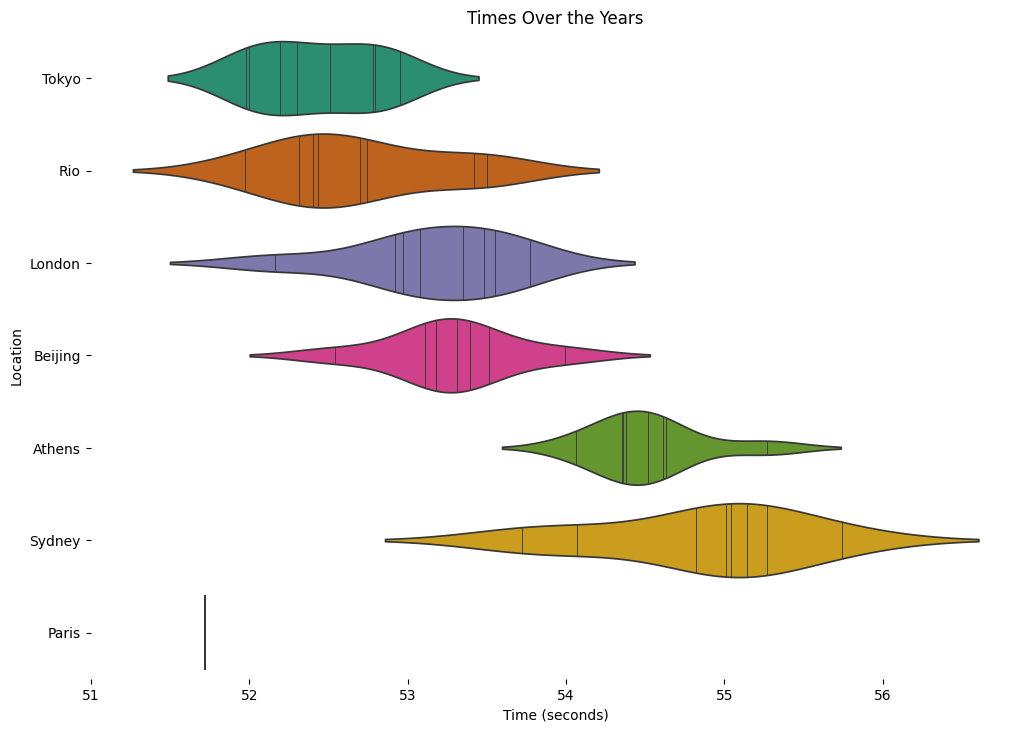

In [305]:
if not df.empty:
    X = df['Year'].values.reshape(-1, 1)
    y = df['Time'].values

    model = RandomForestRegressor()

    model.fit(X, y)

    predicted_time_2024 = model.predict(np.array([[2024]]))

    #plotting data including the various locations prior olympics took place
    figsize = (12, 1.2 * len(df['Location'].unique()))
    plt.figure(figsize=figsize)

    #use violinplot to visualize the distribution of times across locations
    sns.violinplot(data=df, x='Time', y='Location', inner='stick', palette='Dark2')

    #plot aesthetics s✨
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Location')
    plt.title(f"Times Over the Years")  # Adjust the title as needed

    plt.show()
else:
    print(f"No data found for event: {df}")
